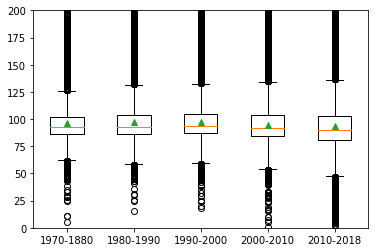

In [27]:
import csv
import matplotlib.pyplot as plt
from bokeh.plotting import figure, show, output_file
from matplotlib.ticker import NullFormatter
import numpy as np
import pandas as pd
 
rdata = pd.read_csv('Movies_21Feb.csv',index_col=0)
ndata = rdata[(rdata.runtimeMinutes != '\\n') & (rdata.runtimeMinutes != 'NaN')]
ndata.head()
ndata.ReleaseYear = ndata.ReleaseYear.astype(int)
ndata.runtimeMinutes = ndata.runtimeMinutes.astype(float)
year_sorted = ndata.sort_values('ReleaseYear')
d1970_1980 = year_sorted[(year_sorted.ReleaseYear >=1970) & (year_sorted.ReleaseYear <1980)]
d1980_1990 = year_sorted[(year_sorted.ReleaseYear >=1980) & (year_sorted.ReleaseYear <1990)]
d1990_2000 = year_sorted[(year_sorted.ReleaseYear >= 1990) & (year_sorted.ReleaseYear <2000)]
d2000_2010 = year_sorted[(year_sorted.ReleaseYear >= 2000) & (year_sorted.ReleaseYear <2010)]
d2010_2018 = year_sorted[(year_sorted.ReleaseYear >= 2010) & (year_sorted.ReleaseYear <=2018)]
t = [d1970_1980.runtimeMinutes,d1980_1990.runtimeMinutes,d1990_2000.runtimeMinutes,d2000_2010.runtimeMinutes,d2010_2018.runtimeMinutes]
lables = ['1970-1880','1980-1990','1990-2000','2000-2010','2010-2018']
plt.figure()
plt.ylim((0,200))
plt.boxplot(t, labels=lables,showmeans = True)
plt.savefig('runtime_vs_year.png')
plt.show()





0         1894
1         1897
2         1900
3         1906
4         1907
5         1908
6         1908
7         1908
8         1908
9         1908
10        1909
11        1909
12        1910
13        1909
14        1909
15        1909
16        1909
17        1910
18        1909
19        1910
20        1910
21        1910
22        1910
23        1910
24        1910
25        1910
26        1912
27        1910
28        1910
29        1911
          ... 
210454    2018
210455    2017
210456    2018
210457    2018
210458    2018
210459    2018
210460    2017
210461    2018
210462    2018
210463    2018
210464    2017
210465    2018
210466    2018
210467    2018
210468    2018
210469    2018
210470    2017
210471    2018
210472    2017
210473    2017
210474    2018
210475    2017
210476    2017
210477    2018
210478    2018
210479    2018
210480    2018
210481    2018
210482    2018
210483    2017
Name: ReleaseYear, Length: 210480, dtype: int64

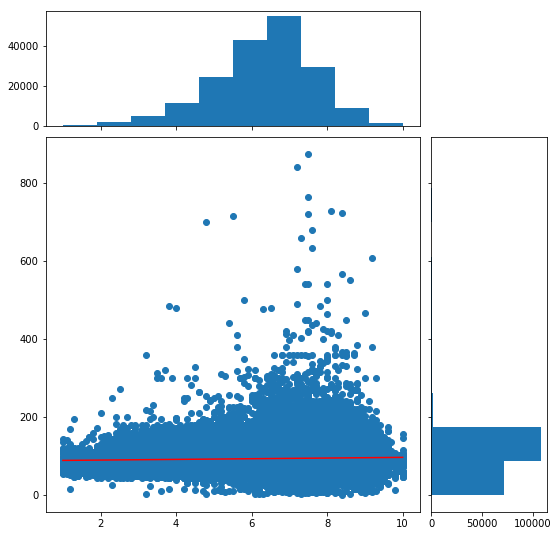

In [26]:

import csv
import matplotlib.pyplot as plt
from bokeh.plotting import figure, show, output_file
from matplotlib.ticker import NullFormatter
import numpy as np
import pandas as pd

ndata = year_sorted[year_sorted.runtimeMinutes <= 1000]
new_rate = ndata.averageRating
new_rate = np.ma.array(new_rate)

nullfmt = NullFormatter()         # no labels

# definitions for the axes
left, width = 0.1, 0.65
bottom, height = 0.1, 0.65
bottom_h = left_h = left + width + 0.02

rect_scatter = [left, bottom, width, height]
rect_histx = [left, bottom_h, width, 0.2]
rect_histy = [left_h, bottom, 0.2, height]

# start with a rectangular Figure
plt.figure(1, figsize=(8, 8))
axScatter = plt.axes(rect_scatter)
axHistx = plt.axes(rect_histx)
axHisty = plt.axes(rect_histy)

# no labels
axHistx.xaxis.set_major_formatter(nullfmt)
axHisty.yaxis.set_major_formatter(nullfmt)
axScatter.scatter( new_rate,ndata.runtimeMinutes,label = '_nolegend_')
axScatter.plot(np.unique(new_rate), np.poly1d(np.polyfit(new_rate, ndata.runtimeMinutes, 1))(np.unique(new_rate)),color ='red')
axHistx.hist(new_rate)
axHisty.hist(ndata.runtimeMinutes, orientation='horizontal')
axHistx.set_xlim(axScatter.get_xlim())
axHisty.set_ylim(axScatter.get_ylim())
plt.show()


